<a href="https://colab.research.google.com/github/Bhanukoya/Masters-Project/blob/master/CTE_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
df  = pd.read_excel('/content/drive/My Drive/Meng Project/Whole_A_datset.xlsx')
df

,Mix No,Mix Types,Cement Source,Supplementary Cementitious Material (SCM),Fine Aggregate Type,Coarse Aggregate,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days)
0,1,A,Source 1,None,Sand A (igneous),Glacial Granite,12.0,6.0,2.25,0.40,50,606,684,676,817,0.000009
1,2,A,Source 1,None,Sand A (igneous),Glacial Granite,11.0,6.2,2.75,0.40,65,623,605,675,829,0.000010
2,3,A,Source 1,None,Sand A (igneous),Glacial Granite,12.0,4.3,1.25,0.40,60,644,665,758,816,0.000009
3,4,A,Source 1,None,Sand A (igneous),Glacial Granite,11.0,5.7,2.75,0.40,60,613,630,682,734,0.000009
4,5,A,Source 1,None,Sand A (igneous),Glacial Granite,9.0,5.1,1.50,0.40,120,631,688,782,904,0.000010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,A-F,Source 1,Fly Ash,Sand B (carbonates),Glacial Granite,23.0,5.6,3.00,0.34,0,582,639,712,731,0.000009
106,107,A-F,Source 1,Fly Ash,Sand B (carbonates),Glacial Granite,21.0,5.9,3.00,0.35,0,595,661,664,788,0.000010
107,108,A-F,Source 1,Fly Ash,Sand B (carbonates),Crushed Stone,20.0,4.5,2.25,0.34,0,698,716,787,897,0.000010
108,109,A-F,Source 1,Fly Ash,Sand B (carbonates),Crushed Stone,25.0,5.8,3.00,0.38,0,602,685,775,782,0.000009


## Dataset Analysis

In [ ]:
df.shape

(110, 16)

In [ ]:
df.describe()

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days)
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,1.100000e+02
mean,55.500000,16.431818,5.240909,2.413636,0.387636,31.336364,662.809091,719.190909,781.545455,874.672727,9.472336e-06
std,31.898276,4.839856,0.674475,0.561000,0.017916,37.958277,65.716586,76.224619,72.508606,71.980516,4.505294e-07
min,1.000000,8.000000,3.400000,1.000000,0.330000,0.000000,508.000000,575.000000,623.000000,721.000000,8.492000e-06
25%,28.250000,12.000000,4.725000,2.000000,0.380000,0.000000,613.000000,663.500000,727.250000,826.750000,9.334000e-06
50%,55.500000,16.000000,5.300000,2.500000,0.400000,10.000000,662.000000,706.500000,781.500000,877.000000,9.508000e-06
75%,82.750000,20.000000,5.775000,3.000000,0.400000,60.000000,703.000000,769.500000,824.750000,922.000000,9.674250e-06
max,110.000000,31.000000,6.600000,3.000000,0.400000,125.000000,849.000000,942.000000,972.000000,1080.000000,1.098400e-05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 16 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Mix No                                     110 non-null    int64  
 1   Mix Types                                  110 non-null    object 
 2   Cement Source                              110 non-null    object 
 3   Supplementary Cementitious Material (SCM)  110 non-null    object 
 4   Fine Aggregate Type                        110 non-null    object 
 5   Coarse Aggregate                           110 non-null    object 
 6   Air Entraining Admixture (AEA) (mL)        110 non-null    float64
 7   Air Content (%)                            110 non-null    float64
 8   Slump (in)                                 110 non-null    float64
 9   Water-to-Cement Ratio (WCM)                110 non-null    float64
 10  Water Reducing Admixture (

In [ ]:
df.isna().sum()

Mix No                                       0
Mix Types                                    0
Cement Source                                0
Supplementary Cementitious Material (SCM)    0
Fine Aggregate Type                          0
Coarse Aggregate                             0
Air Entraining Admixture (AEA) (mL)          0
Air Content (%)                              0
Slump (in)                                   0
Water-to-Cement Ratio (WCM)                  0
Water Reducing Admixture (WRA) (mL)          0
Modulus of Rupture (PSI) (7 Days)            0
Modulus of Rupture (PSI) (14 Days)           0
Modulus of Rupture (PSI) (28 Days)           0
Modulus of Rupture (PSI) (90 Days)           0
CTE (mm/mm/0C) (28 Days)                     0
dtype: int64

In [ ]:
df.dtypes

Mix No                                         int64
Mix Types                                     object
Cement Source                                 object
Supplementary Cementitious Material (SCM)     object
Fine Aggregate Type                           object
Coarse Aggregate                              object
Air Entraining Admixture (AEA) (mL)          float64
Air Content (%)                              float64
Slump (in)                                   float64
Water-to-Cement Ratio (WCM)                  float64
Water Reducing Admixture (WRA) (mL)            int64
Modulus of Rupture (PSI) (7 Days)              int64
Modulus of Rupture (PSI) (14 Days)             int64
Modulus of Rupture (PSI) (28 Days)             int64
Modulus of Rupture (PSI) (90 Days)             int64
CTE (mm/mm/0C) (28 Days)                     float64
dtype: object

### Analysis of Feature variables

In [ ]:
import scipy
from scipy import stats

sns.set(style='whitegrid')

In [ ]:
# Function to find number of ouliers and to draw feature plots

def Feature_analysis(x):


  Q1 = df[x].quantile(q=0.25)
  Q3 = df[x].quantile(q=0.75)
  IQR = stats.iqr(df[x])

  print('1st Quartile of ' + x + ' :' , Q1)
  print('3rd Quartile of ' + x + ' :', Q3)
  print('Inter Quartile range of ' + x + ' :', IQR, '\n')



  Lower_outlier = Q1 - 1.5*(IQR)
  upper_outlier = Q3 + 1.5*(IQR)

  print('Lower outlier value in ' + x + ' :', Lower_outlier)
  print('upper outlier value in ' + x + ' :', upper_outlier, '\n')



  print('Number of lower outliers in ' + x + ' :' ,df[df[x]<Lower_outlier][x].count())
  print('Number of upper outliers in ' + x + ' :' ,df[df[x]>upper_outlier][x].count())

  print('% of lower outliers in ' + x + ' :', round(df[df[x]<Lower_outlier][x].count()*100/len(df)))
  print('% of upper outliers in ' + x + ' :', round(df[df[x]>upper_outlier][x].count()*100/len(df)),'\n' )




  fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(16,5))

  # Distribution plot
  sns.distplot(df[x], ax=ax1)
  ax1.set_xlabel(x, fontsize=15)
  ax1.set_title('Distribution plot', fontsize=20)
  ax1.tick_params(labelsize=15)

  # Box plot
  sns.boxplot(df[x], ax=ax2, orient='v' )
  ax2.set_ylabel(x, fontsize=15)
  ax2.set_title( x +' ' + 'Distribution', fontsize=20)
  ax2.tick_params(labelsize=15)


  # Histogram
  ax3.hist(df[x])
  ax3.set_xlabel(x, fontsize = 15)
  ax3.set_title('Histogram', fontsize = 20)
  ax3.tick_params(labelsize=15)


  plt.tight_layout()

1st Quartile of Air Entraining Admixture (AEA) (mL) : 12.0
3rd Quartile of Air Entraining Admixture (AEA) (mL) : 20.0
Inter Quartile range of Air Entraining Admixture (AEA) (mL) : 8.0 

Lower outlier value in Air Entraining Admixture (AEA) (mL) : 0.0
upper outlier value in Air Entraining Admixture (AEA) (mL) : 32.0 

Number of lower outliers in Air Entraining Admixture (AEA) (mL) : 0
Number of upper outliers in Air Entraining Admixture (AEA) (mL) : 0
% of lower outliers in Air Entraining Admixture (AEA) (mL) : 0.0
% of upper outliers in Air Entraining Admixture (AEA) (mL) : 0.0 



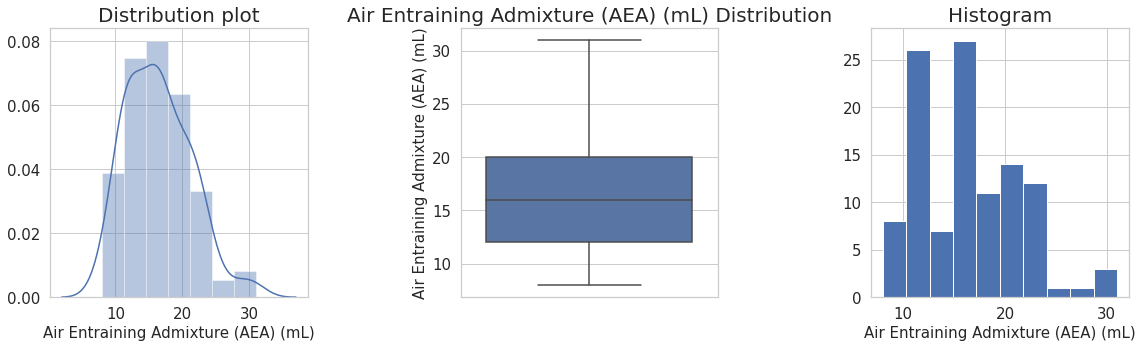

In [ ]:
Feature_analysis('Air Entraining Admixture (AEA) (mL)')

1st Quartile of Air Content (%) : 4.7250000000000005
3rd Quartile of Air Content (%) : 5.7749999999999995
Inter Quartile range of Air Content (%) : 1.049999999999999 

Lower outlier value in Air Content (%) : 3.150000000000002
upper outlier value in Air Content (%) : 7.349999999999998 

Number of lower outliers in Air Content (%) : 0
Number of upper outliers in Air Content (%) : 0
% of lower outliers in Air Content (%) : 0.0
% of upper outliers in Air Content (%) : 0.0 



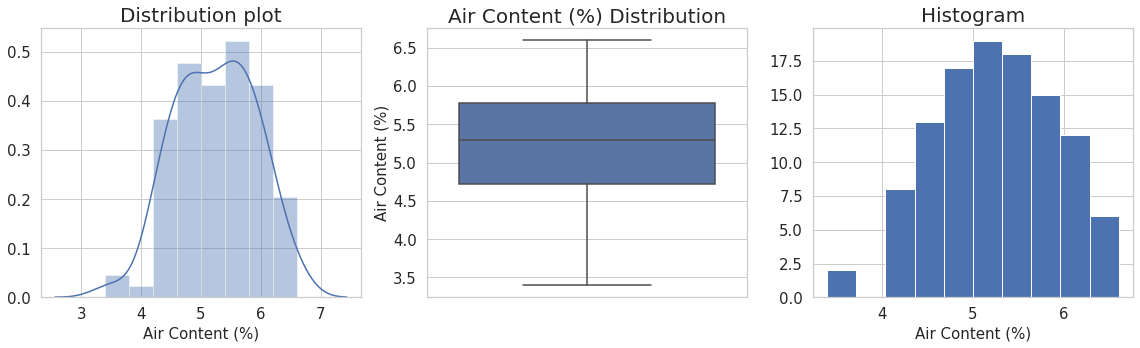

In [ ]:
Feature_analysis('Air Content (%)')

1st Quartile of Slump (in) : 2.0
3rd Quartile of Slump (in) : 3.0
Inter Quartile range of Slump (in) : 1.0 

Lower outlier value in Slump (in) : 0.5
upper outlier value in Slump (in) : 4.5 

Number of lower outliers in Slump (in) : 0
Number of upper outliers in Slump (in) : 0
% of lower outliers in Slump (in) : 0.0
% of upper outliers in Slump (in) : 0.0 



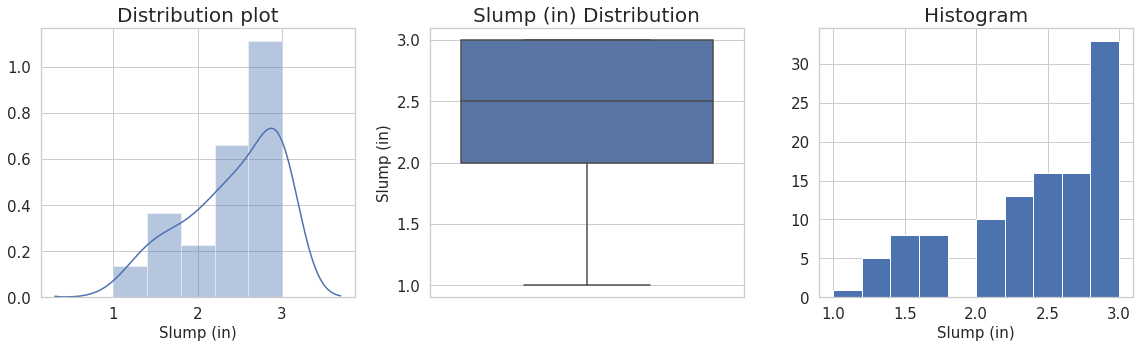

In [ ]:
Feature_analysis('Slump (in)')

1st Quartile of Water-to-Cement Ratio (WCM) : 0.38
3rd Quartile of Water-to-Cement Ratio (WCM) : 0.4
Inter Quartile range of Water-to-Cement Ratio (WCM) : 0.020000000000000018 

Lower outlier value in Water-to-Cement Ratio (WCM) : 0.35
upper outlier value in Water-to-Cement Ratio (WCM) : 0.43000000000000005 

Number of lower outliers in Water-to-Cement Ratio (WCM) : 7
Number of upper outliers in Water-to-Cement Ratio (WCM) : 0
% of lower outliers in Water-to-Cement Ratio (WCM) : 6.0
% of upper outliers in Water-to-Cement Ratio (WCM) : 0.0 



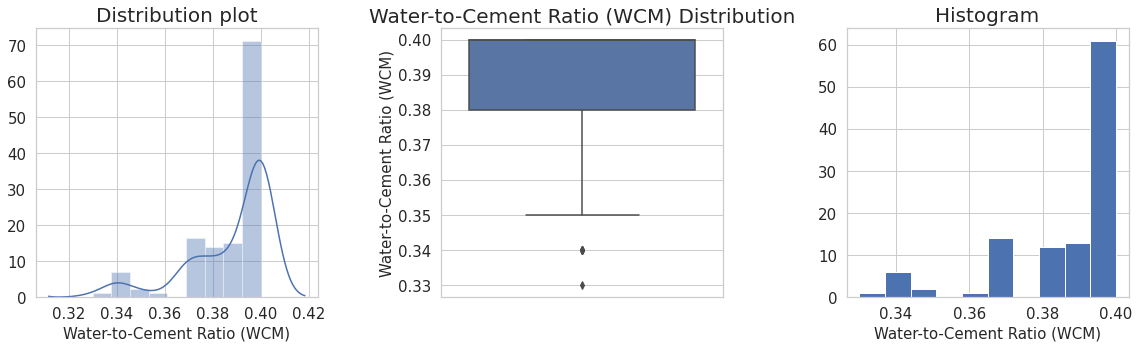

In [ ]:
Feature_analysis('Water-to-Cement Ratio (WCM)')

1st Quartile of Water Reducing Admixture (WRA) (mL) : 0.0
3rd Quartile of Water Reducing Admixture (WRA) (mL) : 60.0
Inter Quartile range of Water Reducing Admixture (WRA) (mL) : 60.0 

Lower outlier value in Water Reducing Admixture (WRA) (mL) : -90.0
upper outlier value in Water Reducing Admixture (WRA) (mL) : 150.0 

Number of lower outliers in Water Reducing Admixture (WRA) (mL) : 0
Number of upper outliers in Water Reducing Admixture (WRA) (mL) : 0
% of lower outliers in Water Reducing Admixture (WRA) (mL) : 0.0
% of upper outliers in Water Reducing Admixture (WRA) (mL) : 0.0 



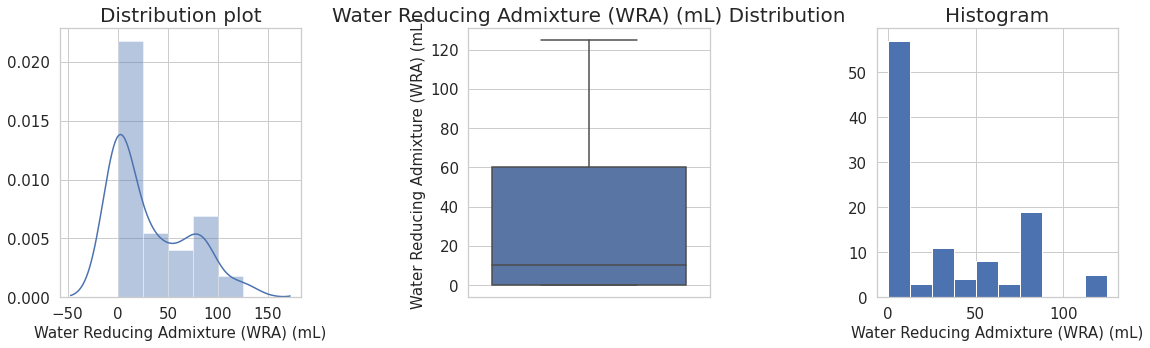

In [ ]:
Feature_analysis('Water Reducing Admixture (WRA) (mL)')

In [ ]:
import plotly
from plotly.offline import iplot
import plotly.graph_objs as go
from plotly.figure_factory import create_distplot

In [ ]:
def plots(x):
  # Box plot
  trace1 = go.Box(y = df[x],name = x, marker = dict(color='rgb(255,0,0)',))
  data = [trace1]
  layout = go.Layout(title = 'Box Plot')
  fig = go.Figure(data = data, layout = layout)
  iplot(fig)
  #fig.write_image("fig1.png")

  # Histogram
  trace1 = go.Histogram(x = df[x], marker = dict(color = 'rgb(0,255,200)') )
  data = [trace1]
  layout = go.Layout(title = 'Histogram',yaxis = dict(title='Count'), xaxis = dict(title = x))
  fig = go.Figure(data = data, layout = layout)
  iplot(fig)

  #Dist plot
  fig = create_distplot(hist_data = [df[x]], group_labels= [x],  show_rug=False, colors=['rgb(200, 110, 30)'])
  fig.update_layout(title_text='Distplot')
  fig.show()


In [ ]:
plots('Air Entraining Admixture (AEA) (mL)')

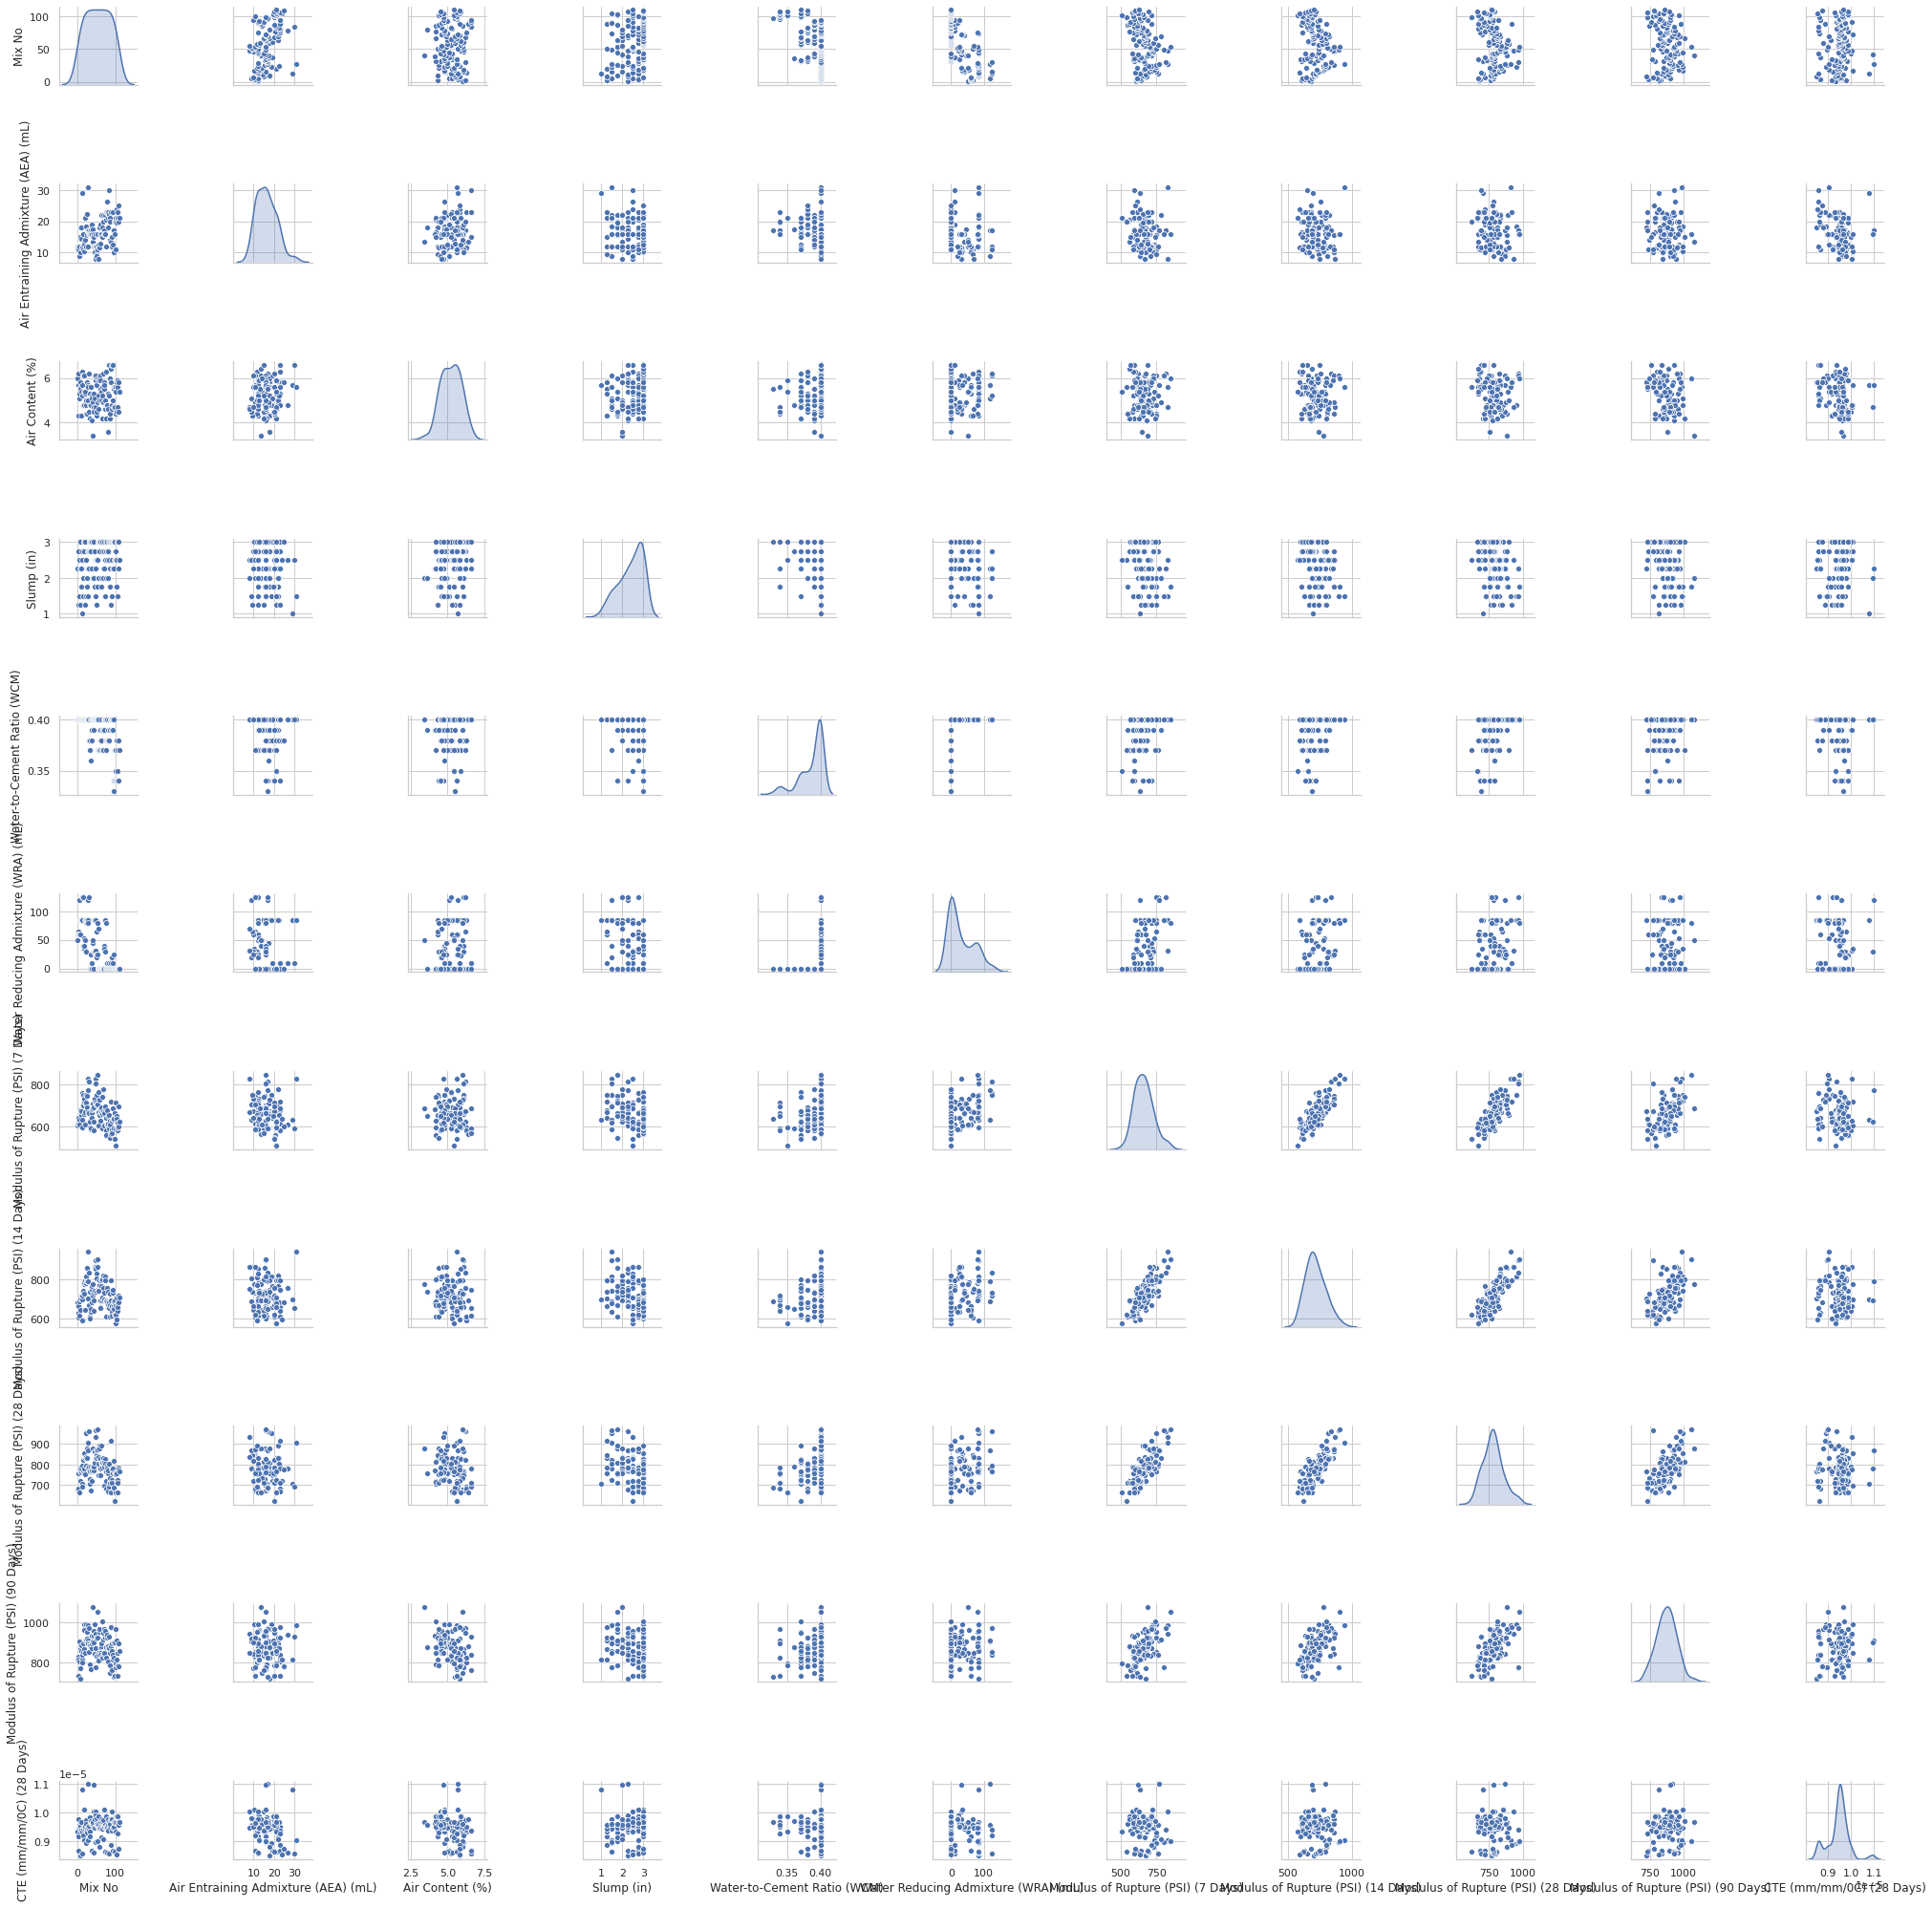

In [ ]:
sns.pairplot(df, diag_kind= 'kde')

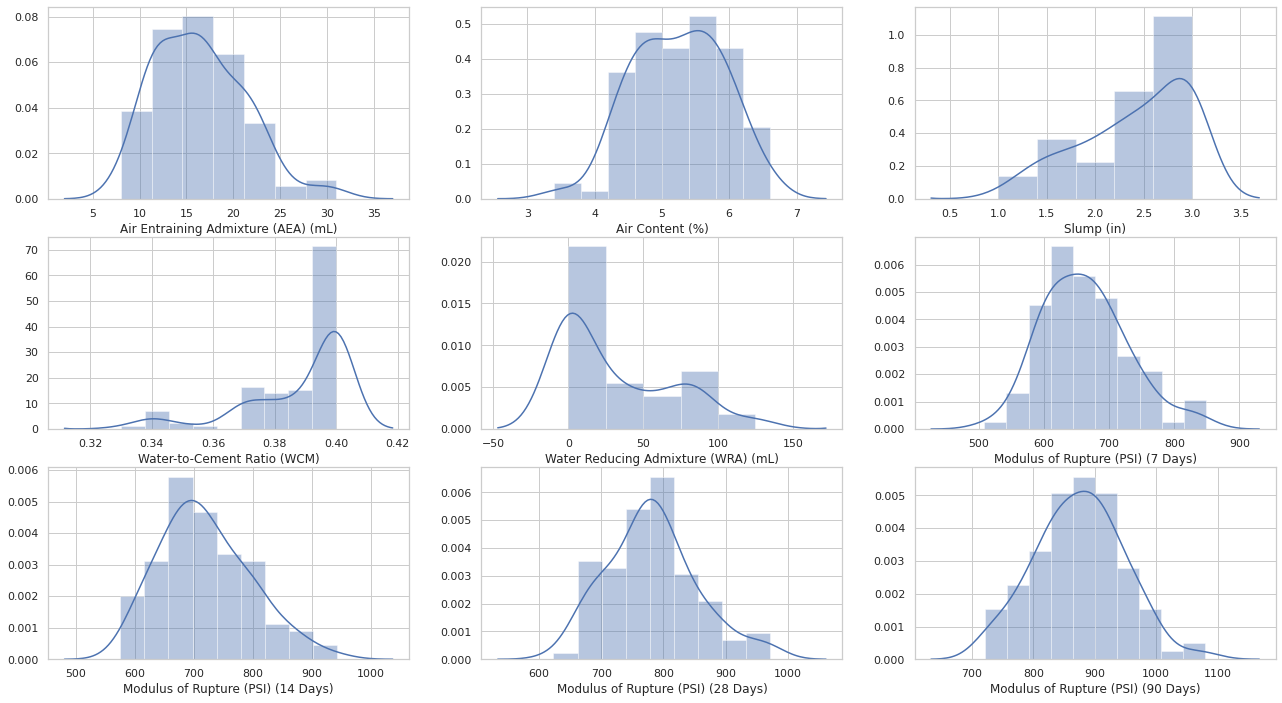

In [ ]:
rows = 3
cols = 3
fig, ax  = plt.subplots(nrows=rows, ncols=cols, figsize = (22, 12))

columns = df.columns[6:]
index = 0

for i in range(rows):
  for j in range(cols):
    sns.distplot( df[columns[index]] ,ax = ax[i][j])
    index += 1

Features Air Entraining Admixture and Air content are near normal distributed

In [ ]:
correlation= df.corr()

Text(0.5, 1.0, 'Correlation among Features')

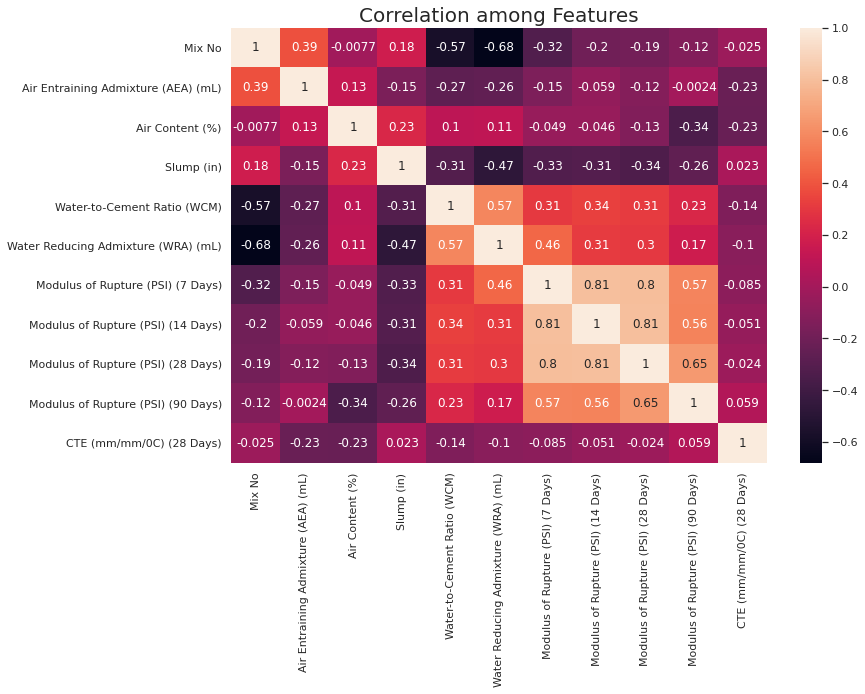

In [ ]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation, annot=True)

plt.title("Correlation among Features", fontsize = 20)

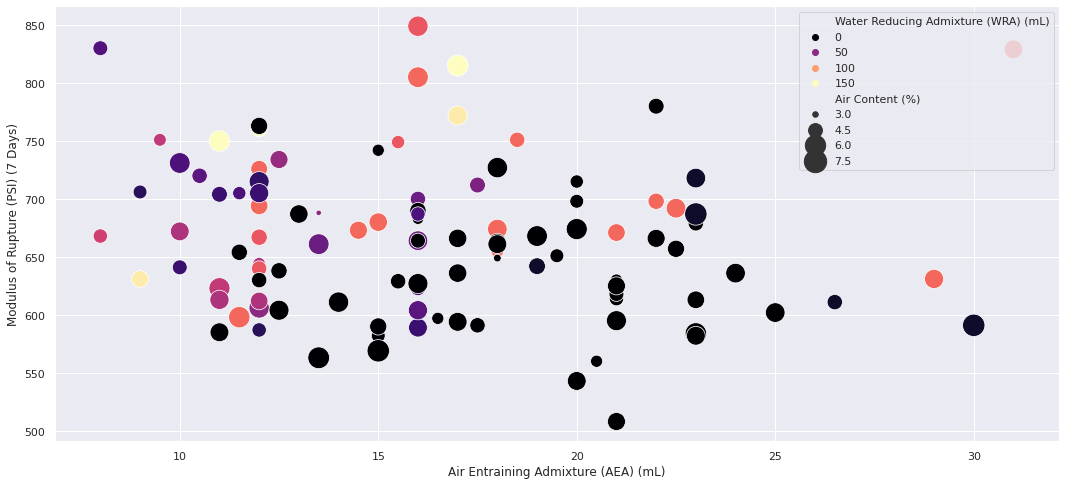

In [ ]:
plt.figure(figsize=(18,8))

sns.set_style(style='darkgrid')
sns.scatterplot(x = df['Air Entraining Admixture (AEA) (mL)'], y= df['Modulus of Rupture (PSI) (7 Days)'], hue=df['Water Reducing Admixture (WRA) (mL)'], size= df['Air Content (%)'], sizes=(30, 500), palette='magma')

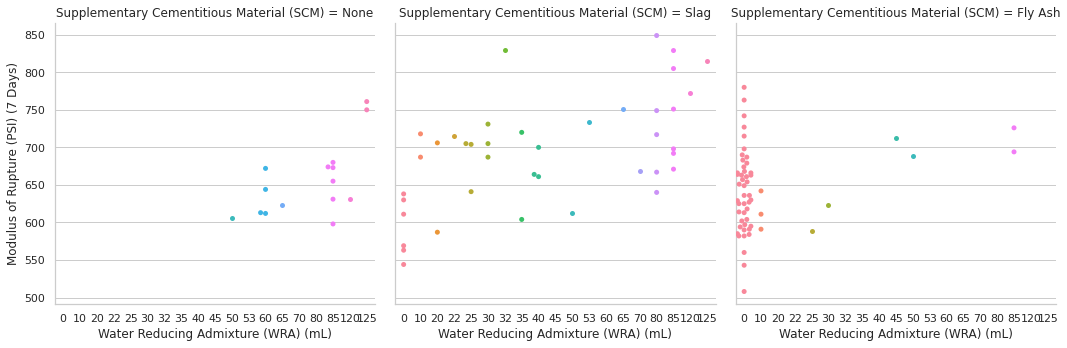

In [ ]:
sns.set_style('whitegrid')
sns.catplot(x = 'Water Reducing Admixture (WRA) (mL)', y = 'Modulus of Rupture (PSI) (7 Days)', col='Supplementary Cementitious Material (SCM)', data=df, kind='swarm')

In [ ]:
df.head(2)

,Mix No,Mix Types,Cement Source,Supplementary Cementitious Material (SCM),Fine Aggregate Type,Coarse Aggregate,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days)
0,1,A,Source 1,None,Sand A (igneous),Glacial Granite,12.0,6.0,2.25,0.4,50,606,684,676,817,0.000009
1,2,A,Source 1,None,Sand A (igneous),Glacial Granite,11.0,6.2,2.75,0.4,65,623,605,675,829,0.000010


In [ ]:
df = pd.get_dummies(df) 

In [ ]:
df

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,1,12.0,6.0,2.25,0.40,50,606,684,676,817,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
1,2,11.0,6.2,2.75,0.40,65,623,605,675,829,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
2,3,12.0,4.3,1.25,0.40,60,644,665,758,816,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
3,4,11.0,5.7,2.75,0.40,60,613,630,682,734,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
4,5,9.0,5.1,1.50,0.40,120,631,688,782,904,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,23.0,5.6,3.00,0.34,0,582,639,712,731,0.000009,0,1,0,1,0,1,0,0,0,1,0,1
106,107,21.0,5.9,3.00,0.35,0,595,661,664,788,0.000010,0,1,0,1,0,1,0,0,0,1,0,1
107,108,20.0,4.5,2.25,0.34,0,698,716,787,897,0.000010,0,1,0,1,0,1,0,0,0,1,1,0
108,109,25.0,5.8,3.00,0.38,0,602,685,775,782,0.000009,0,1,0,1,0,1,0,0,0,1,1,0


In [ ]:
df.head()

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,1,12.0,6.0,2.25,0.4,50,606,684,676,817,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
1,2,11.0,6.2,2.75,0.4,65,623,605,675,829,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
2,3,12.0,4.3,1.25,0.4,60,644,665,758,816,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
3,4,11.0,5.7,2.75,0.4,60,613,630,682,734,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
4,5,9.0,5.1,1.50,0.4,120,631,688,782,904,0.000010,1,0,0,1,0,0,1,0,1,0,0,1


Dropping columns 'Mix Types_A-S', 'Cement Source_Source 2', 'Supplementary Cementitious Materila (SCM)_Slag', 'Fine Aggregate Type_Sand B (carbonates)', 'Coarse Aggregate_Glacial Granite'      
to avoid dummy variable trap

In [ ]:
#df.drop(columns= ['Mix Types_A-S', 'Cement Source_Source 2', 'Supplementary Cementitious Materila (SCM)_Slag', 'Fine Aggregate Type_Sand B (carbonates)', 'Coarse Aggregate_Glacial Granite'], axis=1, inplace=True)

In [ ]:
df

,Mix No,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Modulus of Rupture (PSI) (7 Days),Modulus of Rupture (PSI) (14 Days),Modulus of Rupture (PSI) (28 Days),Modulus of Rupture (PSI) (90 Days),CTE (mm/mm/0C) (28 Days),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,1,12.0,6.0,2.25,0.40,50,606,684,676,817,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
1,2,11.0,6.2,2.75,0.40,65,623,605,675,829,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
2,3,12.0,4.3,1.25,0.40,60,644,665,758,816,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
3,4,11.0,5.7,2.75,0.40,60,613,630,682,734,0.000009,1,0,0,1,0,0,1,0,1,0,0,1
4,5,9.0,5.1,1.50,0.40,120,631,688,782,904,0.000010,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,106,23.0,5.6,3.00,0.34,0,582,639,712,731,0.000009,0,1,0,1,0,1,0,0,0,1,0,1
106,107,21.0,5.9,3.00,0.35,0,595,661,664,788,0.000010,0,1,0,1,0,1,0,0,0,1,0,1
107,108,20.0,4.5,2.25,0.34,0,698,716,787,897,0.000010,0,1,0,1,0,1,0,0,0,1,1,0
108,109,25.0,5.8,3.00,0.38,0,602,685,775,782,0.000009,0,1,0,1,0,1,0,0,0,1,1,0


In [ ]:
x = df.drop(columns= ['Mix No', 'Modulus of Rupture (PSI) (7 Days)', 'Modulus of Rupture (PSI) (14 Days)',
                      'Modulus of Rupture (PSI) (28 Days)', 'Modulus of Rupture (PSI) (90 Days)',
                      'CTE (mm/mm/0C) (28 Days)'], axis=1)
#y = df['CTE (mm/mm/0C) (28 Days)']
#y = df['Modulus of Rupture (PSI) (7 Days)']
#y = df['Modulus of Rupture (PSI) (14 Days)']
y = df['Modulus of Rupture (PSI) (28 Days)']
#y = df['Modulus of Rupture (PSI) (90 Days)']

In [ ]:
x

,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,12.0,6.0,2.25,0.40,50,1,0,0,1,0,0,1,0,1,0,0,1
1,11.0,6.2,2.75,0.40,65,1,0,0,1,0,0,1,0,1,0,0,1
2,12.0,4.3,1.25,0.40,60,1,0,0,1,0,0,1,0,1,0,0,1
3,11.0,5.7,2.75,0.40,60,1,0,0,1,0,0,1,0,1,0,0,1
4,9.0,5.1,1.50,0.40,120,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,23.0,5.6,3.00,0.34,0,0,1,0,1,0,1,0,0,0,1,0,1
106,21.0,5.9,3.00,0.35,0,0,1,0,1,0,1,0,0,0,1,0,1
107,20.0,4.5,2.25,0.34,0,0,1,0,1,0,1,0,0,0,1,1,0
108,25.0,5.8,3.00,0.38,0,0,1,0,1,0,1,0,0,0,1,1,0


In [ ]:
y

0      676
1      675
2      758
3      682
4      782
      ... 
105    712
106    664
107    787
108    775
109    768
Name: Modulus of Rupture (PSI) (28 Days), Length: 110, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score ,accuracy_score, precision_score, mean_squared_error

ss = StandardScaler()
x.iloc[ : , 0:5]= ss.fit_transform(x.iloc[ : , 0:5])
x

,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,-0.919883,1.130605,-0.293022,0.693264,0.493938,1,0,0,1,0,0,1,0,1,0,0,1
1,-1.127446,1.428489,0.602323,0.693264,0.890918,1,0,0,1,0,0,1,0,1,0,0,1
2,-0.919883,-1.401409,-2.083712,0.693264,0.758591,1,0,0,1,0,0,1,0,1,0,0,1
3,-1.127446,0.683779,0.602323,0.693264,0.758591,1,0,0,1,0,0,1,0,1,0,0,1
4,-1.542573,-0.209873,-1.636040,0.693264,2.346509,1,0,0,1,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,1.363314,0.534837,1.049996,-2.671106,-0.829326,0,1,0,1,0,1,0,0,0,1,0,1
106,0.948187,0.981663,1.049996,-2.110378,-0.829326,0,1,0,1,0,1,0,0,0,1,0,1
107,0.740624,-1.103525,-0.293022,-2.671106,-0.829326,0,1,0,1,0,1,0,0,0,1,1,0
108,1.778440,0.832721,1.049996,-0.428193,-0.829326,0,1,0,1,0,1,0,0,0,1,1,0


In [ ]:
x[0:1]

,Air Entraining Admixture (AEA) (mL),Air Content (%),Slump (in),Water-to-Cement Ratio (WCM),Water Reducing Admixture (WRA) (mL),Mix Types_A,Mix Types_A-F,Mix Types_A-S,Cement Source_Source 1,Cement Source_Source 2,Supplementary Cementitious Material (SCM)_Fly Ash,Supplementary Cementitious Material (SCM)_None,Supplementary Cementitious Material (SCM)_Slag,Fine Aggregate Type_Sand A (igneous),Fine Aggregate Type_Sand B (carbonates),Coarse Aggregate_Crushed Stone,Coarse Aggregate_Glacial Granite
0,-0.919883,1.130605,-0.293022,0.693264,0.493938,1,0,0,1,0,0,1,0,1,0,0,1


## Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(x_train,y_train)

print('Train score',lr_model.score(x_train,y_train))

print('Test score',lr_model.score(x_test, y_test))

Train score 0.6369707303905225
Test score 0.5739604211343479


In [ ]:
lr_cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print(lr_cv_score)
print(np.mean(lr_cv_score))

[ 0.39419384  0.2536673   0.46940407  0.22480218 -0.03929253  0.24718381
  0.15253163 -0.13269052  0.18249382  0.26660993]
0.20189035238788627


## Support Vector Regressor

In [ ]:
from sklearn.svm import SVR

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 10)

svr_model = SVR()

svr_model.fit(x_train, y_train)

print('Train score' , svr_model.score(x_train,y_train))

print('Test score', svr_model.score(x_test, y_test))


Train score 0.06285644154509817
Test score 0.0585487099335844


In [ ]:
svr_cv_score = cross_val_score(SVR(), x, y, cv=10)

print(svr_cv_score)
print(np.mean(svr_cv_score))

[-1.18626568e+00  3.59388996e-02 -5.54715255e-01  5.03035252e-04
 -3.61413097e+00 -6.71582722e-01  6.10828657e-02 -8.64095524e-01
 -1.26049390e-01 -1.26294913e+00]
-0.8182263863672399


In [ ]:
from sklearn.model_selection import GridSearchCV

svr_Gs_clf = GridSearchCV(SVR(),  { 'C':list(range(2,100, 2)), 'kernel': ['linear', 'rbf', 'poly'] }, cv=10, return_train_score=False)

svr_Gs_clf.fit(x, y)

svr_df = pd.DataFrame(svr_Gs_clf.cv_results_)
print(svr_df)

print(svr_Gs_clf.best_params_)

print(svr_Gs_clf.best_score_)

     mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0         0.003182      0.000994  ...        0.423739               90
1         0.002799      0.000161  ...        0.975940              147
2         0.002733      0.000367  ...        0.874120              145
3         0.002795      0.000219  ...        0.289736               48
4         0.003256      0.001017  ...        0.908727              146
..             ...           ...  ...             ...              ...
142       0.003495      0.000178  ...        0.325744               56
143       0.003847      0.000090  ...        0.634708              130
144       0.006966      0.002881  ...        0.289356               20
145       0.003352      0.000073  ...        0.320206               58
146       0.003909      0.000173  ...        0.660138              133

[147 rows x 20 columns]
{'C': 90, 'kernel': 'linear'}
0.24674783576405943


In [ ]:
svr_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003182,0.000994,0.001197,0.000099,2,linear,"{'C': 2, 'kernel': 'linear'}",-0.659124,0.117289,-0.086778,0.371386,-0.781582,-0.245694,0.333192,-0.659279,0.336927,0.098194,-0.117547,0.423739,90
1,0.002799,0.000161,0.001212,0.000080,2,rbf,"{'C': 2, 'kernel': 'rbf'}",-1.217794,0.061492,-0.478639,0.035235,-3.321464,-0.581229,0.112619,-0.801438,-0.073125,-1.086752,-0.735109,0.975940,147
2,0.002733,0.000367,0.001230,0.000168,2,poly,"{'C': 2, 'kernel': 'poly'}",-1.241767,-0.016118,-0.344703,0.005135,-2.932888,-0.582215,0.140187,-0.755627,0.062947,-0.522792,-0.618784,0.874120,145
3,0.002795,0.000219,0.001148,0.000089,4,linear,"{'C': 4, 'kernel': 'linear'}",-0.077274,0.245112,0.221189,0.464405,-0.370108,0.085428,0.237155,-0.443742,0.348085,0.305691,0.101594,0.289736,48
4,0.003256,0.001017,0.001302,0.000262,4,rbf,"{'C': 4, 'kernel': 'rbf'}",-1.129305,0.132020,-0.389807,0.069194,-3.034254,-0.498675,0.165316,-0.730131,0.014045,-0.795316,-0.619691,0.908727,146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,0.003495,0.000178,0.001227,0.000069,96,rbf,"{'C': 96, 'kernel': 'rbf'}",0.000479,0.075679,-0.029220,0.131473,-0.936228,0.197812,0.092528,-0.026736,0.183470,0.280586,-0.003016,0.325744,56
143,0.003847,0.000090,0.001148,0.000024,96,poly,"{'C': 96, 'kernel': 'poly'}",-0.081108,-0.229032,-0.126165,0.269681,-1.020682,0.261465,0.031545,-0.241132,0.027353,-1.901774,-0.300985,0.634708,130
144,0.006966,0.002881,0.001359,0.000133,98,linear,"{'C': 98, 'kernel': 'linear'}",0.777738,0.191233,0.547678,0.355613,-0.182706,0.259561,0.109741,-0.241796,0.287040,0.326132,0.243024,0.289356,20
145,0.003352,0.000073,0.001206,0.000057,98,rbf,"{'C': 98, 'kernel': 'rbf'}",0.006600,0.068795,-0.032380,0.129437,-0.923387,0.198711,0.089906,-0.025278,0.181522,0.262909,-0.004316,0.320206,58


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor()

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 10)

dt_model.fit(x_train, y_train)

print( 'Train score' ,dt_model.score(x_train, y_train))

print('Test score',dt_model.score(x_test , y_test))

print(dt_model.get_params)


Train score 1.0
Test score 0.3218573387285557
<bound method BaseEstimator.get_params of DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')>


In [ ]:
dt_cv_score = cross_val_score(DecisionTreeRegressor(), x, y, cv=10)

print(dt_cv_score)
print(np.mean(dt_cv_score))

[-0.18227033 -0.50917507 -0.36613884 -0.60687738 -1.21225549 -1.76386771
 -0.35658012 -0.80903123 -0.823344   -1.75538727]
-0.8384927451635399


In [ ]:
dt_Gs_clf = GridSearchCV(DecisionTreeRegressor(), {'criterion': ['mse', 'mae']}, cv=10, return_train_score=False)
dt_Gs_clf.fit(x,y)

dt_df = pd.DataFrame(dt_Gs_clf.cv_results_)
print(dt_df)

print(dt_Gs_clf.best_params_)

print(dt_Gs_clf.best_score_)


   mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0       0.002426      0.000731  ...        0.519828                1
1       0.003891      0.000297  ...        1.113913                2

[2 rows x 19 columns]
{'criterion': 'mse'}
-0.9371002348697826


## Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import RandomForestRegressor

x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.1, random_state = 10)

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)

print('Train score', rf_model.score(x_train, y_train))
print('Test score',rf_model.score(x_test, y_test))

Train score 0.9260570966682925
Test score 0.7940954850397937


In [ ]:
rf_cv_score = cross_val_score(RandomForestRegressor(), x, y , cv=10, )

print(rf_cv_score)
print(np.mean(rf_cv_score))


[-0.37574937 -0.09346917 -0.38828418 -0.04349144 -0.4820584  -0.24025891
  0.31494064 -0.31759606  0.28493647 -0.60460736]
-0.19456377793686416


In [ ]:
rf_Gs_clf = GridSearchCV( RandomForestRegressor(), {'n_estimators':list(range(10, 201, 10)) }, cv=10, return_train_score=False)
rf_Gs_clf.fit(x,y)

rf_df = pd.DataFrame(rf_Gs_clf.cv_results_)
print(rf_df)

print(rf_Gs_clf.best_params_)

print(rf_Gs_clf.best_score_)


    mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0        0.015412      0.001711  ...        0.531269               20
1        0.027553      0.001671  ...        0.393773               17
2        0.039994      0.002568  ...        0.316546                7
3        0.051039      0.000529  ...        0.301396               18
4        0.063996      0.000848  ...        0.298791               15
5        0.077350      0.003274  ...        0.315925               12
6        0.087769      0.001249  ...        0.450347               19
7        0.100251      0.001609  ...        0.290238               11
8        0.112124      0.001628  ...        0.291611                1
9        0.123241      0.001583  ...        0.288450                8
10       0.138122      0.003760  ...        0.338707                9
11       0.149883      0.002744  ...        0.329201                4
12       0.163722      0.002529  ...        0.323671               14
13       0.175010   

## Model selection

In [ ]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

models = {
    'Linear_Regression': {'model': LinearRegression(), 'parameters' : {'normalize': ['True', 'False']}   } ,

    'Support_Vector_Regressor':  {'model': SVR(), 'parameters': { 'C':list(range(2,101, 2)), 'kernel': ['linear', 'rbf', 'poly']  }  }   ,

    'Decision_Tree_Regressor': {'model': DecisionTreeRegressor(), 'parameters' : {'criterion': ['mse', 'mae']}   } ,

    'Random_Forest_Regressor': {'model': RandomForestRegressor(), 'parameters' : {'n_estimators':list(range(10, 201, 10)) }  } 
    
}

In [ ]:
scores = []

for model_name, value in models.items():

  clf = GridSearchCV( value['model'] , value['parameters'], cv=10, return_train_score=False)
  clf.fit(x,y)

  scores.append(
      { 'model': model_name,
    'best_parameters' : clf.best_params_ ,
   'best_score' : clf.best_score_
  })


model_selection_df = pd.DataFrame(scores)

In [ ]:
model_selection_df

,model,best_parameters,best_score
0,Linear_Regression,{'normalize': 'True'},0.201890
1,Support_Vector_Regressor,"{'C': 90, 'kernel': 'linear'}",0.246748
2,Decision_Tree_Regressor,{'criterion': 'mse'},-0.988611
3,Random_Forest_Regressor,{'n_estimators': 30},-0.132618


## R2 Plots

In [ ]:
from math import sqrt

from sklearn.model_selection import KFold

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



mean_r2_scores = []
mean_rmse_scores = []

for k in range(1,101):
  
  
  kf = KFold(n_splits=10, shuffle=True, random_state=k)


  #model = LinearRegression(normalize=True)
  #model = SVR(C=100, kernel='linear')
  #model = DecisionTreeRegressor(criterion='mae')
  model = RandomForestRegressor(n_estimators=40)
  
  r2_score = cross_val_score(model, x,y, cv=kf, scoring='r2')
  mse_score = -(cross_val_score(model, x,y, cv=kf, scoring='neg_mean_squared_error'))
  rmse_score = np.sqrt(mse_score)


  print('r2 scores for',k, 'iteration : '  ,r2_score)
  print('rmse scores for', k ,'iteration :',rmse_score)
  print('mean r2 score for',k, 'iteration :' ,np.mean(r2_score))
  print('mean rmse score for',k, 'iteration :',  np.mean(rmse_score), '\n')

  mean_r2_scores.append(np.mean(r2_score))
  mean_rmse_scores.append(np.mean(rmse_score))
  

r2 scores for 1 iteration :  [-0.35570581  0.35320985  0.69810571  0.28941478  0.37993416  0.7803949
  0.55291902  0.19694724  0.52669517  0.33697771]
rmse scores for 1 iteration : [50.58993174 70.06725138 57.80196993 46.95516721 61.78480249 30.87631484
 37.24461752 66.23469677 56.82925783 43.63678989]
mean r2 score for 1 iteration : 0.3758892740521754
mean rmse score for 1 iteration : 52.20207995861894 

r2 scores for 2 iteration :  [ 0.66517     0.58326257  0.00431426  0.04530717 -0.45700801  0.67404913
 -0.14555119  0.1735569   0.67934389  0.51686196]
rmse scores for 2 iteration : [33.11929282 74.16568637 48.95786047 52.7844362  39.76504004 52.10958841
 70.98672211 50.667439   35.33473777 59.79576604]
mean r2 score for 2 iteration : 0.2739306672028438
mean rmse score for 2 iteration : 51.768656922535875 

r2 scores for 3 iteration :  [0.05010438 0.58697088 0.22490354 0.10741482 0.59908763 0.33247007
 0.56277846 0.52855177 0.50608482 0.59378206]
rmse scores for 3 iteration : [50.5495

[0.3758892740521754, 0.2739306672028438, 0.4092148438409109, 0.22153085790004065, 0.3549273784873569, 0.4009179968952781, 0.440190177770336, 0.412592176889463, 0.29747077937616195, 0.4016404891293755, 0.3244615733830961, 0.275104307839511, 0.35654611744154596, 0.33084536307265006, 0.38262324462284997, 0.23414919318067134, 0.3847535703477142, 0.4536427818194813, 0.3581028229856339, 0.34330623780652425, 0.42100161911597694, 0.3369164811265036, 0.42952594516309467, 0.2180200591155681, 0.3024011732919358, 0.30936155334422394, 0.2788917340678504, 0.3249562077209022, 0.35619867052290055, 0.32021285340540845, 0.30736798319933534, 0.4455480490842951, 0.4103519227138982, 0.34588680168872565, 0.44354531118911017, 0.24195458386512989, 0.258188325542862, 0.3338158955758891, 0.4022021101138987, 0.3638163411213033, 0.4039981433073011, 0.3440258120924642, 0.2360351944586431, 0.31296028973291623, 0.3185260017022139, 0.4109698785773158, 0.27723820776097396, 0.22328751076857362, 0.4264947179660548, 0.40

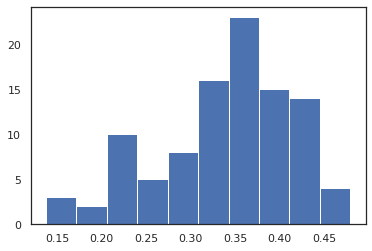

In [ ]:
print(mean_r2_scores)
print(mean_rmse_scores)
plt.hist(mean_r2_scores)
plt.show()

(array([ 2.,  4.,  8., 11., 21., 22., 13., 10.,  7.,  2.]),
 array([47.74146664, 48.44331568, 49.14516472, 49.84701376, 50.5488628 ,
        51.25071184, 51.95256088, 52.65440992, 53.35625896, 54.058108  ,
        54.75995705]),
 <a list of 10 Patch objects>)

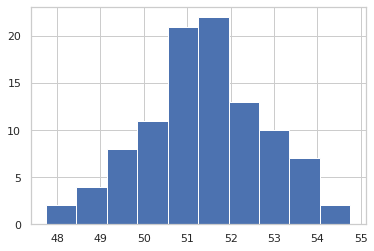

In [ ]:
plt.hist(mean_rmse_scores)

In [ ]:
std = df['Modulus of Rupture (PSI) (7 Days)'].std()

normalized_mean_rmse_scores = [x/std for x in mean_rmse_scores]

(array([ 2.,  4.,  8., 11., 21., 22., 13., 10.,  7.,  2.]),
 array([0.72647515, 0.73715509, 0.74783503, 0.75851497, 0.7691949 ,
        0.77987484, 0.79055478, 0.80123472, 0.81191465, 0.82259459,
        0.83327453]),
 <a list of 10 Patch objects>)

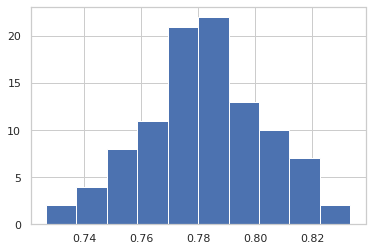

In [ ]:
plt.hist(normalized_mean_rmse_scores)

In [ ]:
model

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.1, random_state = 20)

In [ ]:
model = LinearRegression(normalize=True)
#model = RandomForestRegressor(n_estimators=40)
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [ ]:
model.predict(x_test)

array([821.75949289, 682.50196746, 860.94696618, 698.34530797,
       923.52296262, 744.78939081, 926.07276684, 726.58028352,
       787.67653431, 784.9217123 , 700.77811476])

In [ ]:
print(y_test)

69     814
1      675
46     933
5      666
48     966
31     707
54     836
2      758
56     746
79     756
106    664
Name: Modulus of Rupture (PSI) (28 Days), dtype: int64


In [ ]:
model.score(x_test, y_test)

0.7886684365038843

In [ ]:
len(x_test)

11

In [ ]:
#model = LinearRegression(normalize=True)
model = RandomForestRegressor(n_estimators=40)
model.fit(x,y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=40, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
model.predict(x)

array([702.45 , 687.3  , 755.4  , 684.7  , 772.75 , 687.7  , 720.875,
       749.5  , 777.525, 773.8  , 776.425, 722.975, 787.325, 722.1  ,
       766.525, 824.65 , 834.75 , 755.95 , 767.2  , 822.55 , 759.575,
       825.7  , 898.1  , 795.6  , 832.125, 850.15 , 876.775, 875.6  ,
       788.5  , 938.25 , 776.05 , 716.925, 743.5  , 745.725, 683.3  ,
       777.175, 762.175, 738.8  , 761.2  , 784.1  , 839.05 , 782.825,
       777.925, 783.825, 804.225, 850.725, 905.775, 833.125, 951.475,
       865.325, 833.425, 871.825, 870.75 , 937.   , 861.45 , 807.8  ,
       762.725, 854.05 , 840.15 , 792.65 , 770.675, 793.75 , 809.025,
       867.3  , 800.475, 806.2  , 805.4  , 811.475, 826.725, 810.025,
       793.9  , 735.65 , 812.85 , 829.7  , 807.65 , 695.475, 726.25 ,
       779.05 , 776.35 , 764.725, 699.7  , 767.425, 784.85 , 702.625,
       734.75 , 730.475, 759.2  , 699.825, 882.625, 769.875, 721.025,
       775.3  , 764.45 , 810.1  , 823.125, 688.525, 697.025, 763.625,
       663.15 , 714.

In [ ]:
model.score(x,y)

0.9244019983573244

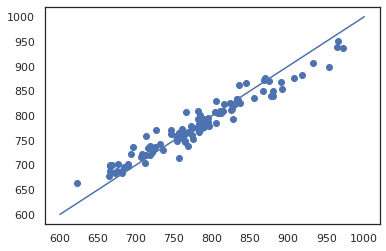

In [ ]:
sns.set_style('white')
#a = [0.00000825,0.00001125]
a = [600, 1000]
plt.plot(a, a)
plt.scatter(y, model.predict(x))

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=10)

for i,j in kf.split(x):
  print(i,j)
  print()

[ 11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109] [ 0  1  2  3  4  5  6  7  8  9 10]

[  0   1   2   3   4   5   6   7   8   9  10  22  23  24  25  26  27  28
  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46
  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64
  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82
  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100
 101 102 103 104 105 106 107 108 109] [11 12 13 14 15 16 17 18 19 20 21]

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  33  34  35  36  37  38  39  40 

-0.478137962885564
0.3207771473258467
-0.28484151851694395
-0.08925563886554855
-0.5752799582199146
0.030326227799278405
0.20466816254395448
-0.4407321600771461
0.2612952121773978
-0.7221291291892249


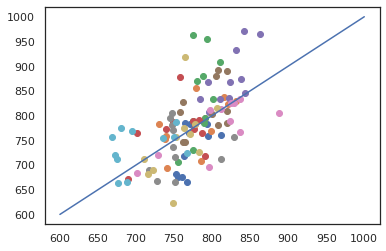

In [ ]:
a = [600, 1000]
plt.plot(a, a)

x = np.array(x)
for i,j in kf.split(x):
  x_train = x[i]
  y_train = y[i]
  x_test = x[j]
  y_test = y[j]

  #model = LinearRegression(normalize=True)
  model = RandomForestRegressor()
  model.fit(x_train, y_train)
  print(model.score(x_test, y_test))
  plt.scatter( model.predict(x_test), y_test)